In [1]:
# Import required packages

import pandas as pd        #---data manipulation library
import numpy as np         #----numerical data manipulation library
import matplotlib as plt   #----library to visualize data
import seaborn as sns      #----library to visualize data
import warnings            #----to ignore warnings
from sklearn.model_selection import train_test_split   #----to split data into train and test sets for predictive modelling
from sklearn.tree import DecisionTreeClassifier #---Decision tree for multi class classification
from sklearn.svm import SVC #---Support vector machine for multi class classification
from sklearn.neighbors import KNeighborsClassifier #---KNN for multi class classification
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score #---performance metrics for models
from sklearn.naive_bayes import GaussianNB  #---Gaussian Naive Bayes classifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Read data from csv file
task1=pd.read_csv(r'C:\Users\USER\Desktop\task1\task1\StudentsPerformance.csv') 
task1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# Add an identifier column to uniquely identify each student
task1['identifier']=range(1,len(task1)+1)
task1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,identifier
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,4
4,male,group C,some college,standard,none,76,78,75,5
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,996
996,male,group C,high school,free/reduced,none,62,55,55,997
997,female,group C,high school,free/reduced,completed,59,71,65,998
998,female,group D,some college,standard,completed,68,78,77,999


In [5]:
# Check Data Description
task1.describe()

,math score,reading score,writing score,identifier
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,500.500000
std,15.16308,14.600192,15.195657,288.819436
min,0.00000,17.000000,10.000000,1.000000
25%,57.00000,59.000000,57.750000,250.750000
50%,66.00000,70.000000,69.000000,500.500000
75%,77.00000,79.000000,79.000000,750.250000
max,100.00000,100.000000,100.000000,1000.000000


In [6]:
# Check if there are any nulls in the data
task1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
identifier                     0
dtype: int64

In [7]:
# Select marks columns to understand student performance (other features are not relevant to the student performance)
marks=task1[['identifier','math score','reading score','writing score']]
cols=marks[['math score','reading score','writing score']]
melt_task1=pd.melt(cols) #---melt dataframe for visualization below
melt_task1

,variable,value
0,math score,72
1,math score,69
2,math score,90
3,math score,47
4,math score,76
...,...,...
2995,writing score,95
2996,writing score,55
2997,writing score,65
2998,writing score,77


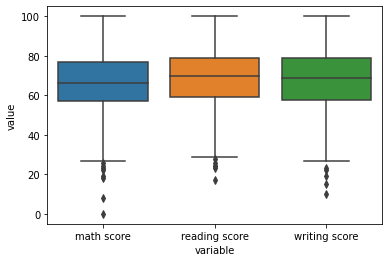

In [8]:
# Visualize data to check for outliers, if any
sns.boxplot(x='variable',y='value',data=melt_task1)

 There are outliers in the box plots, but these may not be irrelevant as it is possible to get scores between 0 to 100 on a test

In [9]:
# Extract marks of students from original data
marks 

,identifier,math score,reading score,writing score
0,1,72,72,74
1,2,69,90,88
2,3,90,95,93
3,4,47,57,44
4,5,76,78,75
...,...,...,...,...
995,996,88,99,95
996,997,62,55,55
997,998,59,71,65
998,999,68,78,77


In [10]:
# Calculate total and average of student marks to determine grade

marks['total']=''
marks['total']=marks['math score']+marks['reading score']+marks['writing score']
marks['average']=''
marks['average']=marks['total']/3
marks['average']=round(marks['average'],2) #---round the average to 2 decimals

In [11]:
marks # display the dataframe

,identifier,math score,reading score,writing score,total,average
0,1,72,72,74,218,72.67
1,2,69,90,88,247,82.33
2,3,90,95,93,278,92.67
3,4,47,57,44,148,49.33
4,5,76,78,75,229,76.33
...,...,...,...,...,...,...
995,996,88,99,95,282,94.00
996,997,62,55,55,172,57.33
997,998,59,71,65,195,65.00
998,999,68,78,77,223,74.33


In [12]:
marks.describe() #---check min and max average marks to set grades for each student

,identifier,math score,reading score,writing score,total,average
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,66.08900,69.169000,68.054000,203.312000,67.770580
std,288.819436,15.16308,14.600192,15.195657,42.771978,14.257311
min,1.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,250.750000,57.00000,59.000000,57.750000,175.000000,58.330000
50%,500.500000,66.00000,70.000000,69.000000,205.000000,68.330000
75%,750.250000,77.00000,79.000000,79.000000,233.000000,77.670000
max,1000.000000,100.00000,100.000000,100.000000,300.000000,100.000000


Add grades based on average marks as below
1. average >= 90      , grade=A1
2. average in (80,90) , grade= A2
3. average in (70,80) , grade= A3
4. average in (60,70) , grade= B
5. average in (50,60) , grade= C
6. average in (40,50) , grade= D
7. average < 40       , grade= F

In [13]:
# filter on 'average' column using np.where
marks['grade']=np.where((marks['average'] >= 90),'A1',
                       np.where((marks['average']>=80) & (marks['average'] < 90),'A2',
                               np.where((marks['average']>=70) & (marks['average'] < 80),'A3',
                                       np.where((marks['average']>=60) & (marks['average'] < 70),'B',
                                               np.where((marks['average']>=50) & (marks['average'] < 60),'C',
                                                       np.where((marks['average']>=40) & (marks['average'] < 50),'D','F'))))))

 Below is our cleaned dataframe with grades as the labelled output class

In [14]:
marks

,identifier,math score,reading score,writing score,total,average,grade
0,1,72,72,74,218,72.67,A3
1,2,69,90,88,247,82.33,A2
2,3,90,95,93,278,92.67,A1
3,4,47,57,44,148,49.33,D
4,5,76,78,75,229,76.33,A3
...,...,...,...,...,...,...,...
995,996,88,99,95,282,94.00,A1
996,997,62,55,55,172,57.33,C
997,998,59,71,65,195,65.00,B
998,999,68,78,77,223,74.33,A3


In [15]:
# Building the predictive models

In [16]:
# Selector features and output labels to build models
pred_data=marks[['math score','reading score','writing score','grade']]
pred_data

,math score,reading score,writing score,grade
0,72,72,74,A3
1,69,90,88,A2
2,90,95,93,A1
3,47,57,44,D
4,76,78,75,A3
...,...,...,...,...
995,88,99,95,A1
996,62,55,55,C
997,59,71,65,B
998,68,78,77,A3


In [17]:
# Separate into input and output labels
X=pred_data.iloc[:,0:-1]
y=pred_data.iloc[:,-1]
y

0      A3
1      A2
2      A1
3       D
4      A3
       ..
995    A1
996     C
997     B
998    A3
999    A2
Name: grade, Length: 1000, dtype: object

In [18]:
# Split into train and test sets (70% training, 30% testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=40)

In [19]:
X_test # check

,math score,reading score,writing score
705,62,72,65
743,59,73,72
268,88,92,95
792,66,74,69
15,69,75,78
...,...,...,...
169,67,75,70
411,84,83,78
278,65,86,80
525,68,60,59


 Our problem is a supervised multi-class classification problem,  therefore we'll use appropriate classification models to predict our output classes

In [20]:
# Naive Bayes Classifier
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
accuracy = gnb.score(X_test, y_test)
cm = confusion_matrix(y_test, gnb_predictions)
report=classification_report(y_test,gnb_predictions)
print('Performance report: \n',report)
print('Accuracy is: \n',accuracy)
print('Confusion matrix: \n',cm)

Performance report: 
               precision    recall  f1-score   support

          A1       0.83      0.94      0.88        16
          A2       0.95      0.89      0.92        44
          A3       0.89      0.94      0.91        78
           B       0.94      0.84      0.89        77
           C       0.91      0.98      0.95        54
           D       0.92      1.00      0.96        22
           F       1.00      0.89      0.94         9

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Accuracy is: 
 0.9166666666666666
Confusion matrix: 
 [[15  1  0  0  0  0  0]
 [ 3 39  2  0  0  0  0]
 [ 0  1 73  4  0  0  0]
 [ 0  0  7 65  5  0  0]
 [ 0  0  0  0 53  1  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  1  8]]


In [21]:
# Decision Tree
dt=DecisionTreeClassifier(max_depth=9).fit(X_train,y_train)
dt_y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test,dt_y_pred)
report=classification_report(y_test,dt_y_pred)
cm=confusion_matrix(y_test,dt_y_pred)
print('Performance report: \n',report)
print('Accuracy is: \n',accuracy)
print('Confusion matrix: \n',cm)

Performance report: 
               precision    recall  f1-score   support

          A1       0.78      0.88      0.82        16
          A2       0.95      0.82      0.88        44
          A3       0.87      0.96      0.91        78
           B       0.94      0.88      0.91        77
           C       0.88      0.96      0.92        54
           D       0.94      0.68      0.79        22
           F       0.82      1.00      0.90         9

    accuracy                           0.90       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.90      0.90      0.90       300

Accuracy is: 
 0.8966666666666666
Confusion matrix: 
 [[14  2  0  0  0  0  0]
 [ 4 36  4  0  0  0  0]
 [ 0  0 75  3  0  0  0]
 [ 0  0  7 68  2  0  0]
 [ 0  0  0  1 52  1  0]
 [ 0  0  0  0  5 15  2]
 [ 0  0  0  0  0  0  9]]


In [22]:
# KNN
knn=KNeighborsClassifier()
knn2=knn.fit(X_train,y_train)
knn_y_pred=knn2.predict(X_test)
accuracy=accuracy_score(knn_y_pred,y_test)
report=classification_report(y_test,knn_y_pred)
cm=confusion_matrix(y_test,knn_y_pred)
print('Accuracy:',accuracy)
print('Confusion matrix:\n',cm)
print('Performance metrics: \n',report)

Accuracy: 0.9466666666666667
Confusion matrix:
 [[15  1  0  0  0  0  0]
 [ 3 40  1  0  0  0  0]
 [ 0  1 76  1  0  0  0]
 [ 0  0  4 71  2  0  0]
 [ 0  0  0  0 52  2  0]
 [ 0  0  0  0  1 21  0]
 [ 0  0  0  0  0  0  9]]
Performance metrics: 
               precision    recall  f1-score   support

          A1       0.83      0.94      0.88        16
          A2       0.95      0.91      0.93        44
          A3       0.94      0.97      0.96        78
           B       0.99      0.92      0.95        77
           C       0.95      0.96      0.95        54
           D       0.91      0.95      0.93        22
           F       1.00      1.00      1.00         9

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.95      0.95       300



In [23]:
# Support Vector Machine
svm=SVC(kernel='rbf',C=2).fit(X_train,y_train)
svm_y_pred=svm.predict(X_test)
#print('Output of model:',svm_y_pred)
#print('Shape of output:',svm_y_pred.shape)
accuracy=accuracy_score(svm_y_pred,y_test)
report=classification_report(y_test,svm_y_pred)
cm=confusion_matrix(y_test,svm_y_pred)
print('Accuracy:',accuracy)
print('Confusion matrix:\n',cm)
print('Performance metrics: \n',report)

Accuracy: 0.99
Confusion matrix:
 [[15  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 75  2  0  0]
 [ 0  0  0  0 54  0  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  9]]
Performance metrics: 
               precision    recall  f1-score   support

          A1       1.00      0.94      0.97        16
          A2       0.98      1.00      0.99        44
          A3       1.00      1.00      1.00        78
           B       1.00      0.97      0.99        77
           C       0.96      1.00      0.98        54
           D       1.00      1.00      1.00        22
           F       1.00      1.00      1.00         9

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

